# **CSE440: Natural Language Processing II (LAB)**
---
## **Lab Assignment 01: NLTK and Exploratory Data Analysis**  

### **Instructions:**  
- This assignment consists of **5 parts**.  
- Each part carries **2 marks**.  
- The total marks for the assignment are **10**.  
- Follow the given instructions carefully and submit your work on time.  

---


### **Student Details**


In [1]:
ID = "22201604" # @param {"type":"string","placeholder":"Write your Student ID here"}
Name = "Priyankan Biswas" # @param {"type":"string","placeholder":"Write your full name here"}

### **Task 01 ||**

In [1]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
Brown_text_files = brown.fileids()
print("List of Brown corpus text files:", Brown_text_files)
print()
nltk.download('gutenberg')
from nltk.corpus import gutenberg
Gutenberg_text_files = gutenberg.fileids()
print("List of Gutenberg corpus text files:", Gutenberg_text_files)


List of Brown corpus text files: ['ca01', 'ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10', 'ca11', 'ca12', 'ca13', 'ca14', 'ca15', 'ca16', 'ca17', 'ca18', 'ca19', 'ca20', 'ca21', 'ca22', 'ca23', 'ca24', 'ca25', 'ca26', 'ca27', 'ca28', 'ca29', 'ca30', 'ca31', 'ca32', 'ca33', 'ca34', 'ca35', 'ca36', 'ca37', 'ca38', 'ca39', 'ca40', 'ca41', 'ca42', 'ca43', 'ca44', 'cb01', 'cb02', 'cb03', 'cb04', 'cb05', 'cb06', 'cb07', 'cb08', 'cb09', 'cb10', 'cb11', 'cb12', 'cb13', 'cb14', 'cb15', 'cb16', 'cb17', 'cb18', 'cb19', 'cb20', 'cb21', 'cb22', 'cb23', 'cb24', 'cb25', 'cb26', 'cb27', 'cc01', 'cc02', 'cc03', 'cc04', 'cc05', 'cc06', 'cc07', 'cc08', 'cc09', 'cc10', 'cc11', 'cc12', 'cc13', 'cc14', 'cc15', 'cc16', 'cc17', 'cd01', 'cd02', 'cd03', 'cd04', 'cd05', 'cd06', 'cd07', 'cd08', 'cd09', 'cd10', 'cd11', 'cd12', 'cd13', 'cd14', 'cd15', 'cd16', 'cd17', 'ce01', 'ce02', 'ce03', 'ce04', 'ce05', 'ce06', 'ce07', 'ce08', 'ce09', 'ce10', 'ce11', 'ce12', 'ce13', 'ce14', 'ce15', 'ce16'

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\biswa\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\biswa\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


### **Task 02 ||**

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\biswa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\biswa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\biswa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


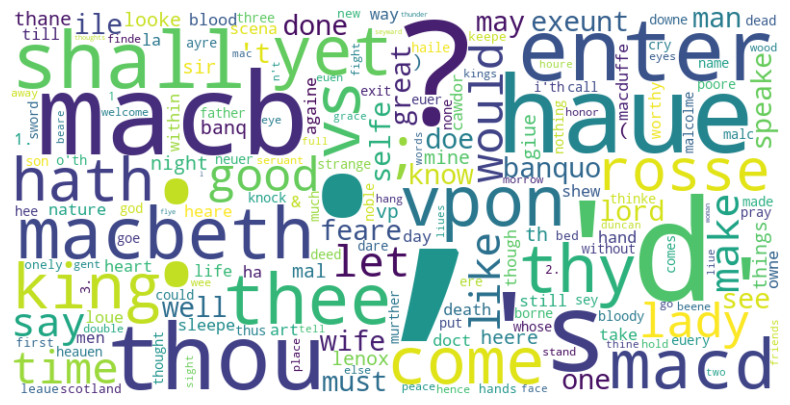

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

selected_novel = gutenberg.raw('shakespeare-macbeth.txt')
macbeth_token = word_tokenize(selected_novel.lower())
filtered_words_of_macbeth = []
for w in macbeth_token:
  if w not in stopwords.words('english'):
    filtered_words_of_macbeth.append(w)

fdist = FreqDist(filtered_words_of_macbeth)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Task 03 ||**

15 most frequent words before preprocessing [(',', 2892), ('.', 1877), ('the', 993), ('and', 862), ('to', 683), ('of', 610), (':', 566), ('i', 560), ('you', 527), ('my', 502), ('a', 497), ('?', 459), ('it', 419), ('in', 389), ('is', 379)]

15 most frequent words after preprocessing [(',', 2892), ('.', 1877), (':', 566), ('?', 459), ('ham', 339), (';', 298), ("'d", 223), ('lord', 222), ('king', 181), ('hau', 177), ('com', 135), ("'s", 122), ('let', 117), ('shal', 111), ('hamlet', 107)]


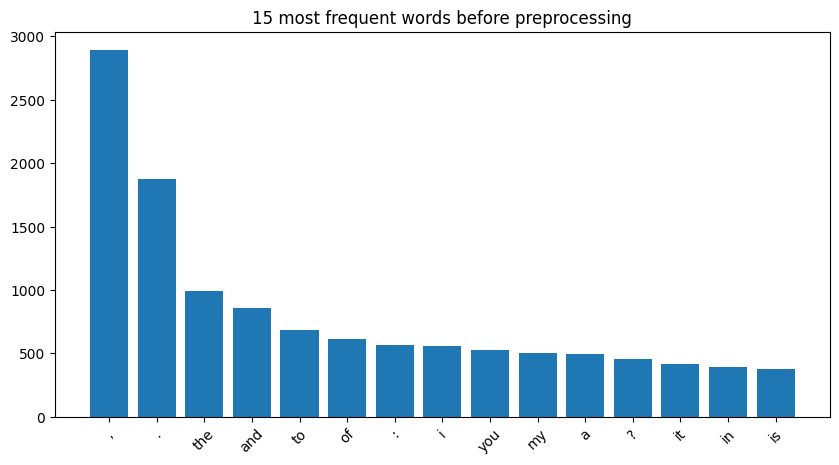

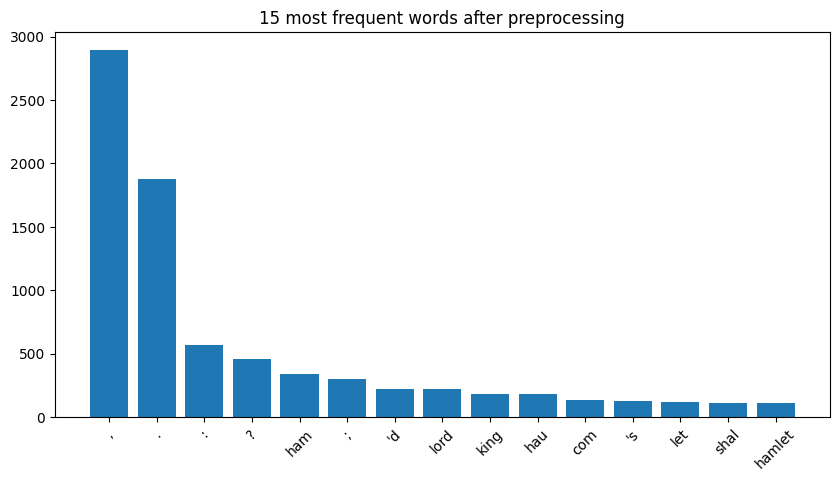

In [6]:

from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

selected_novel = gutenberg.raw('shakespeare-hamlet.txt')
hamlet_token = word_tokenize(selected_novel.lower())
filtered_words_of_hamlet = []
for w in hamlet_token:
  if w not in stopwords.words('english'):
    filtered_words_of_hamlet.append(w)

l = LancasterStemmer()
stemmed_words = []
for w in filtered_words_of_hamlet:
    stemmed_words.append(l.stem(w))


before = FreqDist(hamlet_token)
after = FreqDist(stemmed_words)
print(f"15 most frequent words before preprocessing {before.most_common(15)}\n")
print("15 most frequent words after preprocessing",after.most_common(15))

plt.figure(figsize=(10,5))
plt.bar(*zip(*before.most_common(15)))
plt.title("15 most frequent words before preprocessing")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(*zip(*after.most_common(15)))
plt.title("15 most frequent words after preprocessing")
plt.xticks(rotation=45)
plt.show()

### **Task 04 ||**

In [5]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

selected_novel = gutenberg.raw('shakespeare-caesar.txt')
caesar_token = word_tokenize(selected_novel.lower())

bigrams = list(ngrams(caesar_token, 2)) 
bigrams_frequency = FreqDist(bigrams) 
top_50_bigrams = bigrams_frequency.most_common(50)  

print("50 Most Common Bigrams:", top_50_bigrams)


50 Most Common Bigrams: [((',', 'and'), 438), (('bru', '.'), 153), ((',', 'i'), 111), ((',', 'that'), 108), (('cassi', '.'), 107), (('.', 'i'), 101), ((',', 'to'), 62), (('.', 'enter'), 54), (('brutus', ','), 52), (('caesar', ','), 51), (('i', 'will'), 50), ((',', 'as'), 49), (('i', 'am'), 48), (('ant', '.'), 48), (('.', 'o'), 42), (('my', 'lord'), 40), ((',', 'the'), 40), (('in', 'the'), 40), ((',', 'for'), 40), ((':', 'and'), 39), (('.', 'what'), 38), (('cask', '.'), 38), (("'d", ','), 37), (('it', 'is'), 37), (('brut', '.'), 37), ((',', 'he'), 36), ((',', 'but'), 36), ((':', 'i'), 35), ((':', 'for'), 35), (('i', 'haue'), 35), (('to', 'the'), 34), (('him', ','), 34), ((',', 'when'), 32), (('that', 'i'), 30), ((',', 'you'), 30), (('me', ','), 30), (('i', 'do'), 30), (('cassius', ','), 29), ((',', 'or'), 29), (('luc', '.'), 28), ((':', 'but'), 27), ((',', 'thou'), 26), (('?', 'bru'), 26), (('you', ','), 25), (('antony', ','), 25), (('.', 'but'), 24), ((',', 'let'), 24), (('.', 'he'), 2

### **Task 05 ||**

[nltk_data] Downloading package udhr to
[nltk_data]     C:\Users\biswa\AppData\Roaming\nltk_data...
[nltk_data]   Package udhr is already up-to-date!


['Abkhaz-Cyrillic+Abkh', 'Abkhaz-UTF8', 'Achehnese-Latin1', 'Achuar-Shiwiar-Latin1', 'Adja-UTF8', 'Afaan_Oromo_Oromiffa-Latin1', 'Afrikaans-Latin1', 'Aguaruna-Latin1', 'Akuapem_Twi-UTF8', 'Albanian_Shqip-Latin1', 'Amahuaca', 'Amahuaca-Latin1', 'Amarakaeri-Latin1', 'Amuesha-Yanesha-UTF8', 'Arabela-Latin1', 'Arabic_Alarabia-Arabic', 'Asante-UTF8', 'Ashaninca-Latin1', 'Asheninca-Latin1', 'Asturian_Bable-Latin1', 'Aymara-Latin1', 'Balinese-Latin1', 'Bambara-UTF8', 'Baoule-UTF8', 'Basque_Euskara-Latin1', 'Batonu_Bariba-UTF8', 'Belorus_Belaruski-Cyrillic', 'Belorus_Belaruski-UTF8', 'Bemba-Latin1', 'Bengali-UTF8', 'Beti-UTF8', 'Bichelamar-Latin1', 'Bikol_Bicolano-Latin1', 'Bora-Latin1', 'Bosnian_Bosanski-Cyrillic', 'Bosnian_Bosanski-Latin2', 'Bosnian_Bosanski-UTF8', 'Breton-Latin1', 'Bugisnese-Latin1', 'Bulgarian_Balgarski-Cyrillic', 'Bulgarian_Balgarski-UTF8', 'Cakchiquel-Latin1', 'Campa_Pajonalino-Latin1', 'Candoshi-Shapra-Latin1', 'Caquinte-Latin1', 'Cashibo-Cacataibo-Latin1', 'Cashinahua-

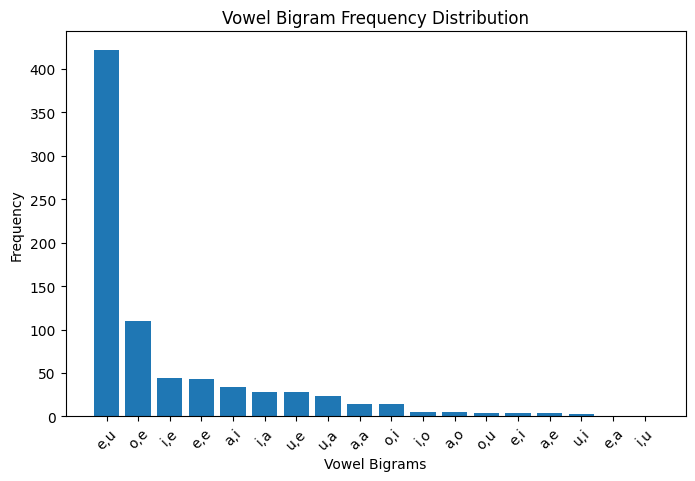

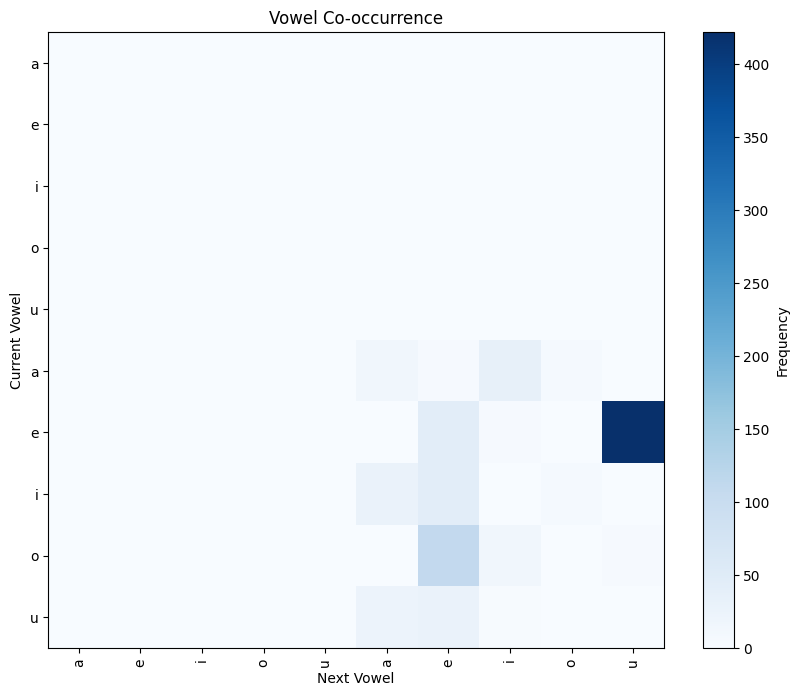

In [8]:
nltk.download('udhr')

import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import udhr
from collections import defaultdict
from tabulate import tabulate


print(udhr.fileids())
h_text = udhr.raw('Achehnese-Latin1')  

vowels = "aeiouAEIOU"
vowel_list = list(vowels.lower())  
bigram_counts = defaultdict(int)
co_occurrence_matrix = np.zeros((len(vowel_list), len(vowel_list)), dtype=int)
v_index = {}  
c = 0
for v in vowel_list:
    v_index[v] = c
    c += 1

for i in range(len(h_text) - 1):
    v1 = h_text[i].lower()
    v2 = h_text[i + 1].lower()
    if v1 in vowel_list and v2 in vowel_list: 
        bigram_counts[(v1, v2)] += 1 
        row = v_index[v1]
        col = v_index[v2]
        co_occurrence_matrix[row, col] += 1  
print("Vowel co_occurrence_matrix",co_occurrence_matrix)
print()
def frequency(item):
    return item[1]
sorted_bigrams = sorted(bigram_counts.items(), key=frequency, reverse=True)
t = []
for (k, v) in sorted_bigrams:
    t.append((k[0], k[1], v))  

print(tabulate(t, headers=["Vowel 1", "Vowel 2", "Frequency"], tablefmt="grid"))

b = []
f = []

for k, v in sorted_bigrams:
    b.append(k[0] + "," + k[1]) 
    f.append(v) 
plt.figure(figsize=(8, 5))
plt.bar(b, f)
plt.xlabel("Vowel Bigrams")
plt.ylabel("Frequency")
plt.title("Vowel Bigram Frequency Distribution")
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(10, 8))
plt.imshow(co_occurrence_matrix, cmap="Blues")
plt.title("Vowel Co-occurrence")
plt.xlabel("Next Vowel")
plt.ylabel("Current Vowel")
plt.xticks(ticks=np.arange(len(vowel_list)), labels=vowel_list, rotation=90)
plt.yticks(ticks=np.arange(len(vowel_list)), labels=vowel_list)
plt.colorbar(label="Frequency")
plt.show()

